In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [28]:
(train_img, train_lab), (test_img, test_lab) = cifar10.load_data()

In [29]:
train_img.shape

(50000, 32, 32, 3)

In [30]:
test_img.shape

(10000, 32, 32, 3)

In [31]:
train_lab.shape

(50000, 1)

In [32]:
test_lab.shape

(10000, 1)

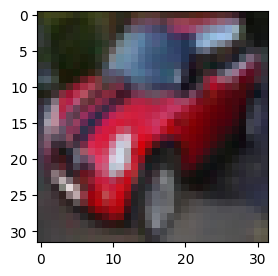

In [34]:
plt.figure(figsize=(3, 3))
plt.imshow(train_img[25323])
plt.show()

In [45]:
classes = [" airplane" , "automible", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

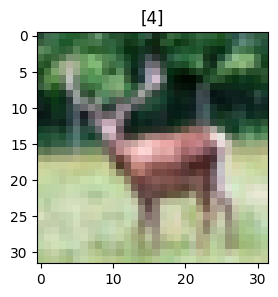

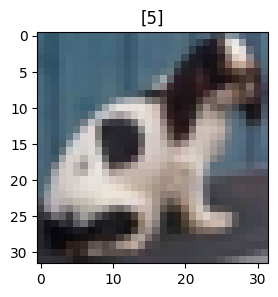

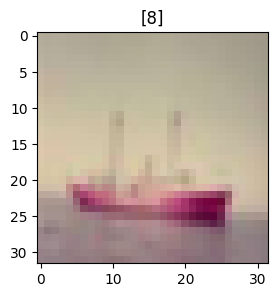

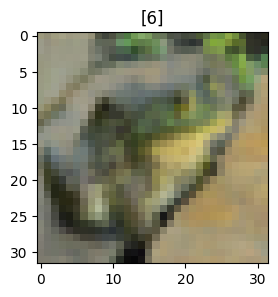

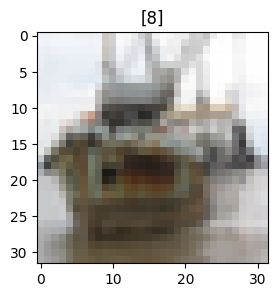

In [37]:
for i in range(5):
    ind = np.random.randint(50000)
    plt.figure(figsize=(3, 3))
    plt.imshow(train_img[ind])
    plt.title(train_lab[ind])
    plt.show()

In [46]:
train_img, test_img = train_img/255.0, test_img/255.0

In [47]:
model = Sequential([ 
    Flatten(input_shape = (32, 32, 3)),
    Dense(500, activation="relu"),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax"),
])

In [48]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [49]:
history = model.fit(train_img, train_lab, epochs = 30, batch_size=32, validation_data=(test_img, test_lab))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.2321 - loss: 2.0524 - val_accuracy: 0.3492 - val_loss: 1.7838
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.3601 - loss: 1.7649 - val_accuracy: 0.4110 - val_loss: 1.6554
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3989 - loss: 1.6709 - val_accuracy: 0.4292 - val_loss: 1.6197
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4285 - loss: 1.5879 - val_accuracy: 0.4363 - val_loss: 1.5716
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4479 - loss: 1.5423 - val_accuracy: 0.4625 - val_loss: 1.5090
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4604 - loss: 1.5035 - val_accuracy: 0.4619 - val_loss: 1.5170
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4703 - loss: 1.4772 - val_accuracy: 0.4735 - val_loss: 1.4860
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4837 -

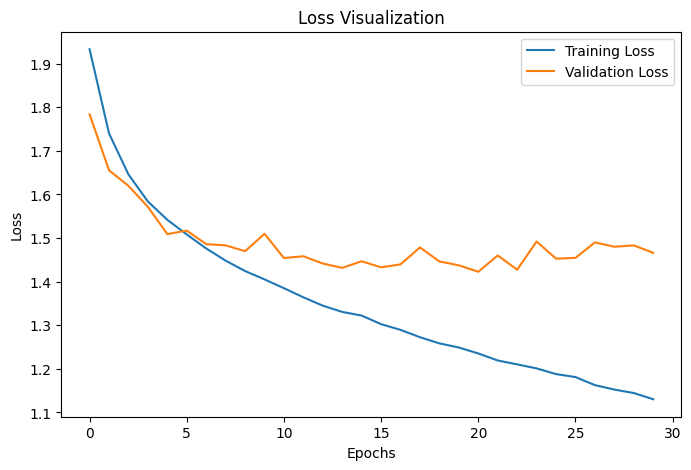

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

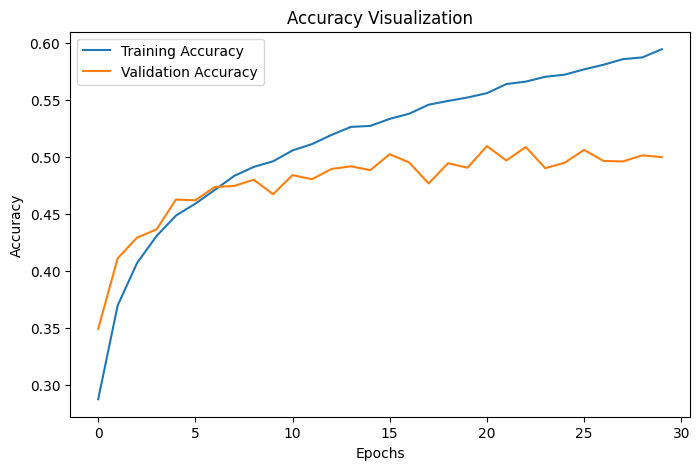

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [59]:
def image_prediction(path):
    img = load_img(path, target_size=(32, 32, 3))
    img_arr = img_to_array(img)
    img_arr_norm = img_arr / 255.0
    img_flatten = np.expand_dims(img_arr_norm, axis=0)
    prediction = model.predict(img_flatten)[0]
    pred_class = classes[np.argmax(prediction)]
    return pred_class

In [64]:
image_prediction("dog.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


'dog'

In [65]:
image_prediction("peacock.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'bird'